# 음식 업종 카드 소비 트렌드

## 데이터 로딩 및 특성 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('음식+업종(한식,일식,+중식,+양식,+패스트푸드점)+카드소비트렌드+데이터_1901_2109.csv', encoding='cp949')
df

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,한식,1,1,7,2.392000e+05
1,201901,한식,1,10,1618,4.671496e+07
2,201901,한식,1,20,150194,4.961334e+09
3,201901,한식,1,30,564787,2.006319e+10
4,201901,한식,1,40,817438,2.954471e+10
...,...,...,...,...,...,...
3776,202109,패밀리레스토랑,2,50,15439,4.351737e+08
3777,202109,패밀리레스토랑,2,60,4330,1.195975e+08
3778,202109,패밀리레스토랑,2,70,869,2.529147e+07
3779,202109,패밀리레스토랑,2,80,155,4.952434e+06


본 데이터셋에서 가장 중요한 것은 ```tco_btc_u_ct```(결제 횟수)와 ```tco_btc_u_am```(결제 금액)일 것이다.

In [2]:
df['tco_btc_u_ct'].sum()

259649957

집계 기간 동안의 카드 결제 횟수는 약 2억 6천만 건

In [3]:
df['tco_btc_u_am'].sum()

7709140233637.0

집계 기간 동안의 카드 결제 금액은 약 7조 7100억 원

In [4]:
df['crym'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004,
       202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012,
       202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108,
       202109], dtype=int64)

2019년 1월부터 2021년 9월까지의 데이터 (2021년은 **연말까지가 아님**)

In [5]:
df['tco_btc_nm'].unique()

array(['한식', '일식', '중식', '양식', '패스트푸드점', '패밀리레스토랑'], dtype=object)

한식, 일식, 중식, 양식, 패스트푸드점, 패밀리레스토랑의 6개 분류에 대한 데이터

In [6]:
df['agegrp_dc'].unique()

array([ 1, 10, 20, 30, 40, 50, 60, 70, 80, 90,  0], dtype=int64)

0은 뭔데...

In [7]:
df['agegrp_dc'].value_counts()

10    396
20    396
30    396
40    396
50    396
60    396
70    396
80    396
90    394
0     196
1      23
Name: agegrp_dc, dtype: int64

In [8]:
df[df['agegrp_dc'] == 0]

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
111,201902,한식,1,0,1,8000.0
230,201903,한식,2,0,1,18000.0
294,201903,패스트푸드점,1,0,1,8600.0
368,201904,중식,1,0,1,10000.0
441,201905,한식,1,0,5,167000.0
...,...,...,...,...,...,...
3713,202109,중식,2,0,8,97700.0
3723,202109,양식,1,0,2,30000.0
3733,202109,양식,2,0,2,55000.0
3743,202109,패스트푸드점,1,0,2,17800.0


In [9]:
df[df['agegrp_dc'] == 1]

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,한식,1,1,7,239200.0
19,201901,일식,1,1,1,81000.0
38,201901,중식,1,1,1,16000.0
84,201901,패스트푸드점,2,1,3,16400.0
220,201903,한식,1,1,1,26000.0
304,201903,패스트푸드점,2,1,2,6500.0
331,201904,한식,1,1,3,50000.0
442,201905,한식,1,1,4,148000.0
499,201905,양식,1,1,1,34400.0
557,201906,한식,1,1,8,264000.0


## 컬럼별 EDA를 통한 분포 확인

### 월별

In [10]:
agg_monthly_df = df.groupby(['crym']).agg({'tco_btc_u_ct': 'sum', 'tco_btc_u_am': 'sum'})
agg_monthly_df.head()

,tco_btc_u_ct,tco_btc_u_am
crym,,
201901,7635701,2.335036e+11
201902,6718594,2.082875e+11
201903,8159189,2.466039e+11
201904,8247496,2.435679e+11
201905,9019183,2.740720e+11


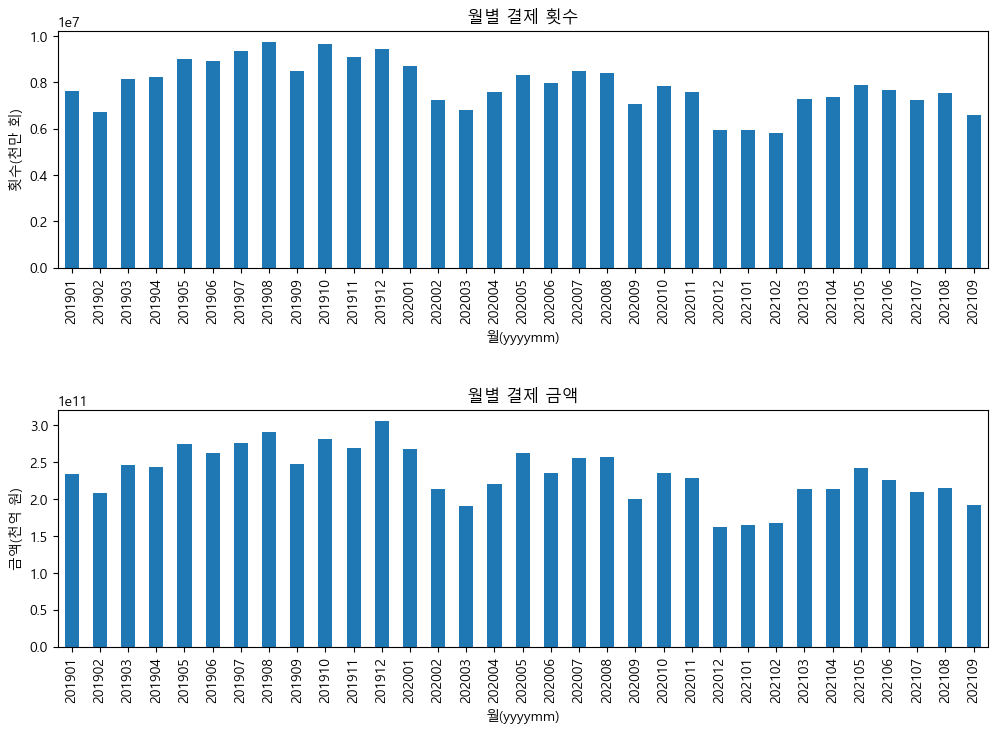

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
agg_monthly_df['tco_btc_u_ct'].plot(kind='bar', ax=axes[0], title='월별 결제 횟수', xlabel='월(yyyymm)', ylabel='횟수(천만 회)')
agg_monthly_df['tco_btc_u_am'].plot(kind='bar', ax=axes[1], title='월별 결제 금액', xlabel='월(yyyymm)', ylabel='금액(천억 원)')
plt.subplots_adjust(hspace=0.6)
plt.show()

2~3월이 유의미하게 적은 분포를 보인다.

### 연도별

In [12]:
df['year'] = df['crym'].apply(str).str[:4]
df.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am,year
0,201901,한식,1,1,7,2.392000e+05,2019
1,201901,한식,1,10,1618,4.671496e+07,2019
2,201901,한식,1,20,150194,4.961334e+09,2019
3,201901,한식,1,30,564787,2.006319e+10,2019
4,201901,한식,1,40,817438,2.954471e+10,2019


In [13]:
df['year'].unique()

array(['2019', '2020', '2021'], dtype=object)

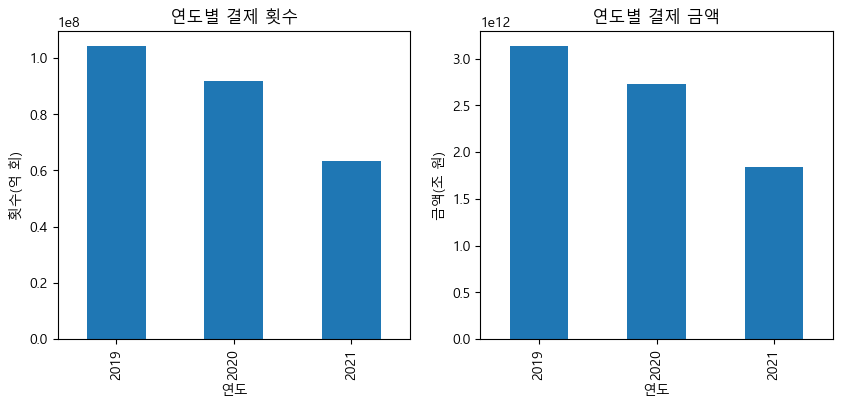

In [14]:
agg_yearly_df = df.groupby(['year']).agg({'tco_btc_u_ct': 'sum', 'tco_btc_u_am': 'sum'})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
agg_yearly_df['tco_btc_u_ct'].plot(kind='bar', ax=axes[0], title='연도별 결제 횟수', xlabel='연도', ylabel='횟수(억 회)')
agg_yearly_df['tco_btc_u_am'].plot(kind='bar', ax=axes[1], title='연도별 결제 금액', xlabel='연도', ylabel='금액(조 원)')
plt.show()

2019년이 다른 해에 비해 확실히 많아보인다. 2021년은 9월까지의 데이터이기 때문에 눈에 띄게 적은 게 당연하다.

### 업종별

In [15]:
agg_categorical_df = df.groupby(['tco_btc_nm']).agg({'tco_btc_u_ct': 'sum', 'tco_btc_u_am': 'sum'})
agg_categorical_df

,tco_btc_u_ct,tco_btc_u_am
tco_btc_nm,,
양식,11012773,3.592554e+11
일식,12947145,5.711789e+11
중식,23211802,5.654612e+11
패밀리레스토랑,3641159,1.069866e+11
패스트푸드점,36906620,3.316175e+11
한식,171930458,5.774641e+12


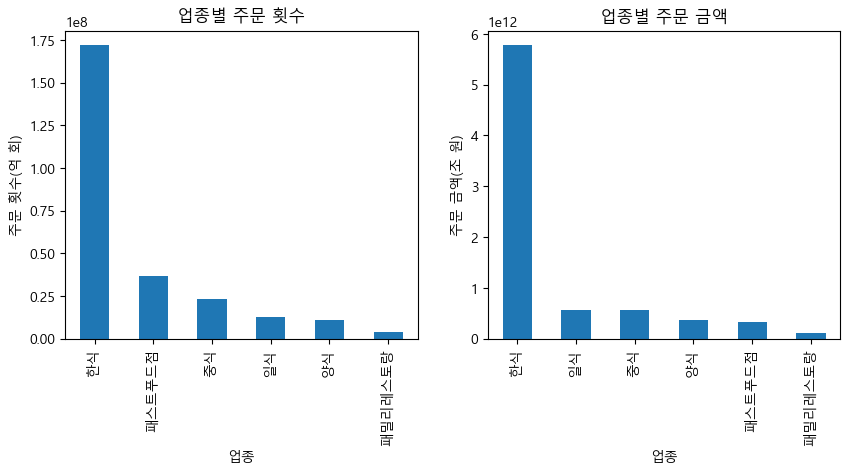

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

agg_categorical_df = agg_categorical_df.sort_values(['tco_btc_u_ct'], ascending=False)
agg_categorical_df['tco_btc_u_ct'].plot(kind='bar', ax=axes[0], title='업종별 주문 횟수', xlabel='업종', ylabel='주문 횟수(억 회)')

agg_categorical_df = agg_categorical_df.sort_values(['tco_btc_u_am'], ascending=False)
agg_categorical_df['tco_btc_u_am'].plot(kind='bar', ax=axes[1], title='업종별 주문 금액', xlabel='업종', ylabel='주문 금액(조 원)')
plt.show()

한식이 횟수와 금액 모두 압도적으로 많으며, 패밀리레스토랑이 압도적으로 적다. 패스트푸드점, 중식, 일식, 양식의 경우 뒤섞인 모습인데, 업종에 따라 **1회 주문 시 발생하는 금액에 차이가 있음**을 파악 가능하다.

### 연령대별

In [17]:
agg_aging_df = df.groupby(['agegrp_dc']).agg({'tco_btc_u_ct': 'sum', 'tco_btc_u_am': 'sum'})
agg_aging_df

,tco_btc_u_ct,tco_btc_u_am
agegrp_dc,,
0,749,1.515989e+07
1,80,2.171700e+06
10,127796,3.229329e+09
20,18584537,5.247816e+11
30,55158025,1.605713e+12
40,90680204,2.633513e+12
50,65704260,1.990089e+12
60,23159306,7.519947e+11
70,5350121,1.714754e+11


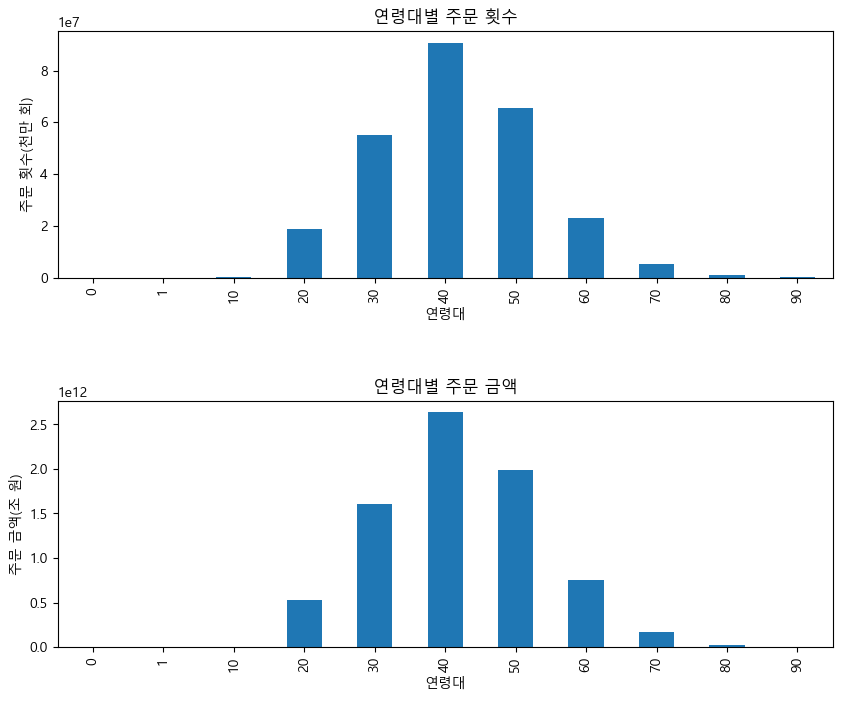

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

agg_aging_df['tco_btc_u_ct'].plot(kind='bar', ax=axes[0], title='연령대별 주문 횟수', xlabel='연령대', ylabel='주문 횟수(천만 회)')
agg_aging_df['tco_btc_u_am'].plot(kind='bar', ax=axes[1], title='연령대별 주문 금액', xlabel='연령대', ylabel='주문 금액(조 원)')
plt.subplots_adjust(hspace=0.5)
plt.show()

결제 횟수와 비용은 40대가 가장 많고, 이를 기준으로 연령대가 낮아지거나 높아질수록 감소하는 추이를 보인다.

## 단가가 비싼 음식 업종

In [19]:
categorical_df = agg_categorical_df.copy()
categorical_df['price_rate'] = categorical_df['tco_btc_u_am'] / categorical_df['tco_btc_u_ct']
categorical_df = categorical_df.sort_values(['price_rate'], ascending=False)
categorical_df

,tco_btc_u_ct,tco_btc_u_am,price_rate
tco_btc_nm,,,
일식,12947145,5.711789e+11,44116.207400
한식,171930458,5.774641e+12,33587.071899
양식,11012773,3.592554e+11,32621.700058
패밀리레스토랑,3641159,1.069866e+11,29382.555439
중식,23211802,5.654612e+11,24360.937115
패스트푸드점,36906620,3.316175e+11,8985.311104


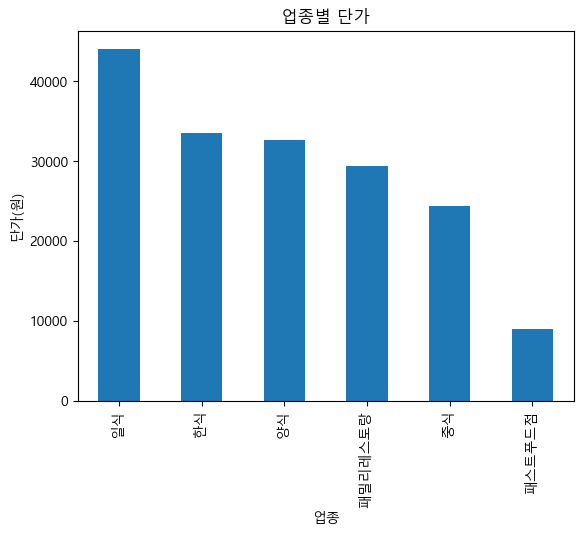

In [20]:
categorical_df['price_rate'].plot(kind='bar', title='업종별 단가', xlabel='업종', ylabel='단가(원)')
plt.show()

일식이 압도적으로 비싼 이유는 아마 오마카세 때문이 아닐까... 반면 패스트푸드점은 가장 싸다!

## 연령대별 업종 선호도

In [43]:
categorical_aging_df = df.groupby(['agegrp_dc', 'tco_btc_nm']).agg({'tco_btc_u_ct': 'sum'})
categorical_aging_df['rate'] = categorical_aging_df.groupby(level='agegrp_dc', group_keys=False).apply(lambda x: x / x.sum())
categorical_aging_df = categorical_aging_df['rate'].unstack(fill_value=0)
categorical_aging_df

tco_btc_nm,양식,일식,중식,패밀리레스토랑,패스트푸드점,한식
agegrp_dc,,,,,,
0,0.102804,0.032043,0.172230,0.012016,0.204272,0.476636
1,0.050000,0.037500,0.012500,0.000000,0.125000,0.775000
10,0.059243,0.063265,0.087170,0.013036,0.179129,0.598156
20,0.068903,0.071858,0.084821,0.013705,0.156640,0.604073
30,0.053171,0.052817,0.092022,0.014900,0.176851,0.610239
40,0.040065,0.047273,0.095697,0.015357,0.161243,0.640365
50,0.036457,0.048022,0.085161,0.013570,0.109532,0.707259
60,0.027119,0.042214,0.077155,0.009627,0.080548,0.763337
70,0.021329,0.042053,0.077517,0.008788,0.083381,0.766932


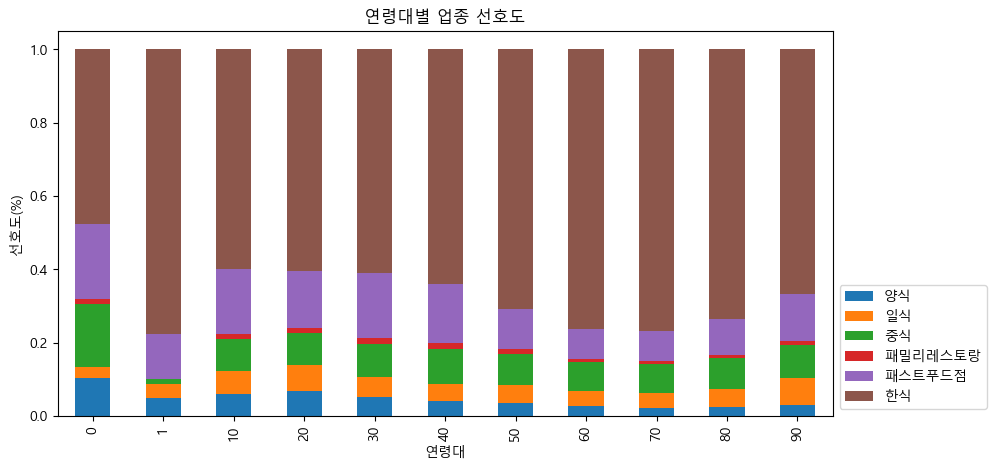

In [45]:
categorical_aging_df.plot(
    kind='bar', stacked=True, figsize=(10,5), title='연령대별 업종 선호도', xlabel='연령대', ylabel='선호도(%)'
)
plt.legend(loc='lower left', bbox_to_anchor=(1.0,0))
plt.show()

역시나 전체적으로 한식이 가장 많이 분포함을 확인해 볼 수 있다. 10대에서는 패스트푸드점의 선호도가 다른 연령대에 비해 높으며, 60~70대의 경우 한식 선호도가 다른 연령대에 비해 월등히 높음을 확인해 볼 수 있다.

In [50]:
categorical_aging_df.transpose()

agegrp_dc,0,1,10,20,30,40,50,60,70,80,90
tco_btc_nm,,,,,,,,,,,
양식,0.102804,0.0500,0.059243,0.068903,0.053171,0.040065,0.036457,0.027119,0.021329,0.023632,0.031772
일식,0.032043,0.0375,0.063265,0.071858,0.052817,0.047273,0.048022,0.042214,0.042053,0.050814,0.072209
중식,0.172230,0.0125,0.087170,0.084821,0.092022,0.095697,0.085161,0.077155,0.077517,0.082961,0.089037
패밀리레스토랑,0.012016,0.0000,0.013036,0.013705,0.014900,0.015357,0.013570,0.009627,0.008788,0.009841,0.011428
패스트푸드점,0.204272,0.1250,0.179129,0.156640,0.176851,0.161243,0.109532,0.080548,0.083381,0.098289,0.128877
한식,0.476636,0.7750,0.598156,0.604073,0.610239,0.640365,0.707259,0.763337,0.766932,0.734462,0.666677


In [52]:
# min-max scale

def min_max_scaling(row):
    min_val = row.min()
    max_val = row.max()
    return (row - min_val) / (max_val - min_val)

In [76]:
categorical_aging_df_scaled = categorical_aging_df.transpose().apply(min_max_scaling, axis=1)
categorical_aging_df_scaled = categorical_aging_df_scaled.drop([0, 1], axis=1)
categorical_aging_df_scaled

agegrp_dc,10,20,30,40,50,60,70,80,90
tco_btc_nm,,,,,,,,,
양식,0.465347,0.583913,0.390819,0.229964,0.185675,0.071074,0.000000,0.028274,0.128177
일식,0.777324,0.991257,0.517219,0.379191,0.397820,0.253241,0.249223,0.467348,1.000000
중식,0.467479,0.452773,0.497852,0.520859,0.454902,0.404776,0.407044,0.441127,0.479165
패밀리레스토랑,0.848881,0.892431,0.970250,1.000000,0.883601,0.626886,0.572255,0.640836,0.744138
패스트푸드점,0.796782,0.615013,0.778368,0.652215,0.234267,0.000000,0.022898,0.143392,0.390623
한식,0.407290,0.427119,0.447786,0.548757,0.772957,0.960909,0.972961,0.864133,0.636944


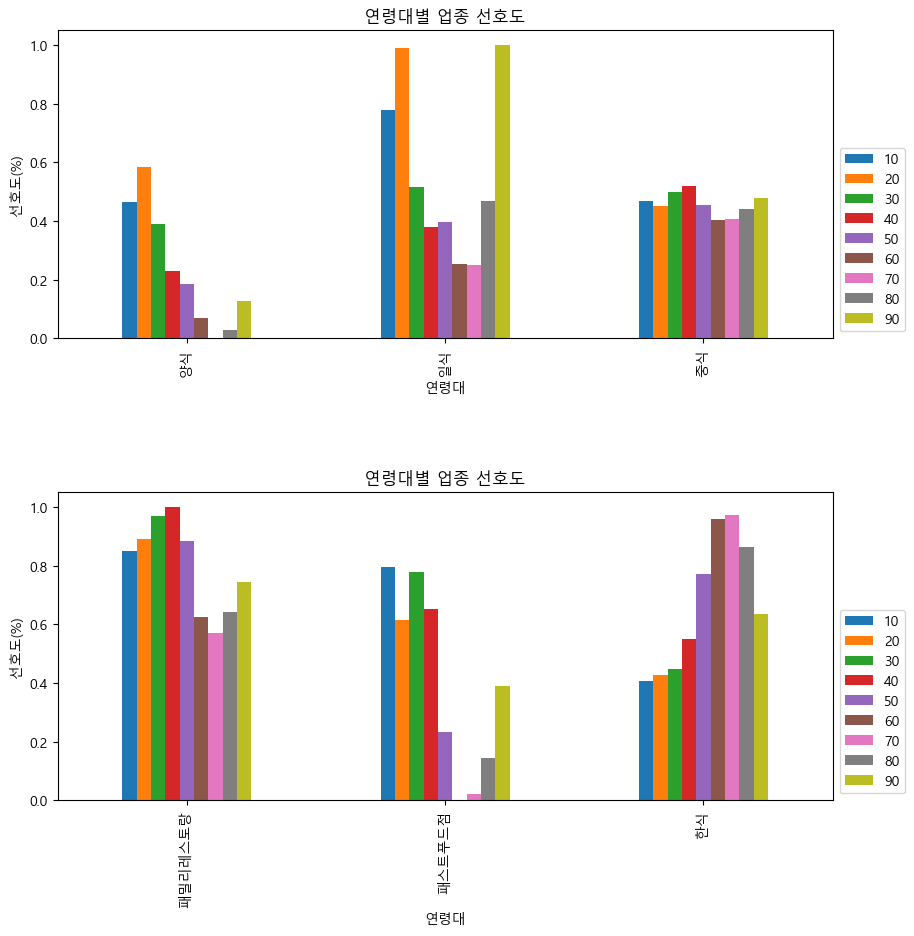

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

categorical_aging_df_scaled.loc[['양식', '일식', '중식']].plot(
    kind='bar', ax=axes[0], title='연령대별 업종 선호도', xlabel='연령대', ylabel='선호도(%)'
)
axes[0].legend(loc='lower left', bbox_to_anchor=(1.0,0))

categorical_aging_df_scaled.loc[['패밀리레스토랑', '패스트푸드점', '한식']].plot(
    kind='bar', ax=axes[1], title='연령대별 업종 선호도', xlabel='연령대', ylabel='선호도(%)'
)
axes[1].legend(loc='lower left', bbox_to_anchor=(1.0,0))

plt.subplots_adjust(hspace=0.5)
plt.show()

## 코로나19와 외식 소비의 관계에 대한 통계적 검정

2019년의 데이터와 2020년의 데이터 사이에 유의미한 차이가 있는지 확인해 보자.

In [23]:
df['crym'].dtype

dtype('int64')

In [24]:
# 2019년, 2020년의 데이터
count_by_month_df = df.groupby(['crym']).agg({'tco_btc_u_ct': 'sum', 'tco_btc_u_am': 'sum'})
count_by_month_1920_df = count_by_month_df[count_by_month_df.index < 202100]
count_by_month_1920_df

,tco_btc_u_ct,tco_btc_u_am
crym,,
201901,7635701,2.335036e+11
201902,6718594,2.082875e+11
201903,8159189,2.466039e+11
201904,8247496,2.435679e+11
201905,9019183,2.740720e+11
201906,8902624,2.626318e+11
201907,9342597,2.759589e+11
201908,9748610,2.908411e+11
201909,8486843,2.477988e+11


In [25]:
len(count_by_month_1920_df)

24

C:\Users\louis\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


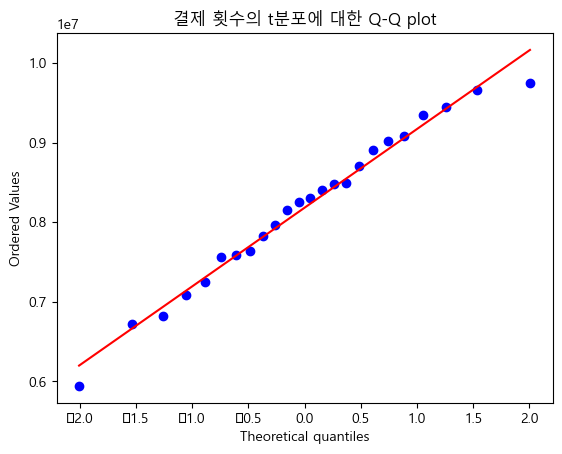

In [26]:
# t분포를 따르는지 보고
import scipy.stats as stats

stats.probplot(count_by_month_1920_df['tco_btc_u_ct'], dist='t', sparams=(len(count_by_month_1920_df) - 1), plot=plt)
plt.title('결제 횟수의 t분포에 대한 Q-Q plot')
plt.show()

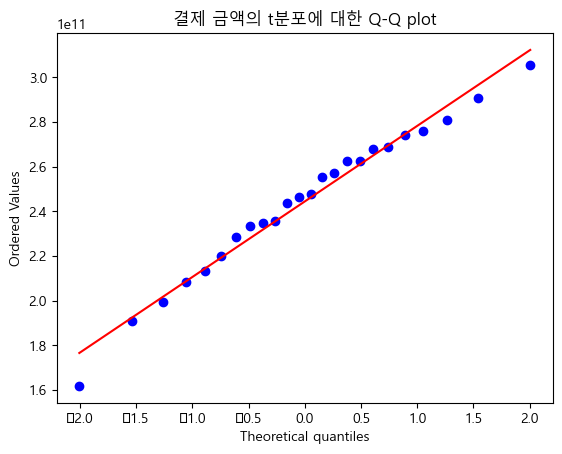

In [27]:
stats.probplot(count_by_month_1920_df['tco_btc_u_am'], dist='t', sparams=(len(count_by_month_1920_df) - 1), plot=plt)
plt.title('결제 금액의 t분포에 대한 Q-Q plot')
plt.show()

둘 다 t분포 따른다고 볼 수 있겠다.

In [28]:
# 2019년과 2020년의 평균 결제 횟수에 대한 t-test

data_2019 = count_by_month_1920_df[count_by_month_1920_df.index < 202000]['tco_btc_u_ct']
data_2020 = count_by_month_1920_df[count_by_month_1920_df.index > 202000]['tco_btc_u_ct']

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(data_2019, data_2020, equal_var=False, alternative='greater') # 등분산 가정 안 함

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준(alpha) 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("귀무 가설을 기각합니다. 2019년의 평균 결제 횟수는 2020년보다 큽니다.")
else:
    print("귀무 가설을 기각하지 않습니다. 2019년의 평균 결제 횟수는 2020년보다 크지 않습니다.")

t-statistic: 3.0111867840291007
p-value: 0.003245201790090016
귀무 가설을 기각합니다. 2019년의 평균 결제 횟수는 2020년보다 큽니다.


In [29]:
# 2019년과 2020년의 평균 결제 금액에 대한 t-test

data_2019 = count_by_month_1920_df[count_by_month_1920_df.index < 202000]['tco_btc_u_am']
data_2020 = count_by_month_1920_df[count_by_month_1920_df.index > 202000]['tco_btc_u_am']

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(data_2019, data_2020, equal_var=False, alternative='greater') # 등분산 가정 안 함

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준(alpha) 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("귀무 가설을 기각합니다. 2019년의 평균 결제 금액은 2020년보다 큽니다.")
else:
    print("귀무 가설을 기각하지 않습니다. 2019년의 평균 결제 금액은 2020년보다 크지 않습니다.")

t-statistic: 2.834311845427932
p-value: 0.0049168213540382675
귀무 가설을 기각합니다. 2019년의 평균 결제 금액은 2020년보다 큽니다.


2019년의 평균 결제 횟수, 평균 결제 금액이 2020년에 비해 통계적으로 유의미하게 크다는 결론을 얻었다.